In [23]:
#Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
#Styling

%matplotlib inline 
sns.set_style ("whitegrid")


In [25]:
#Load datasets

adhd_data = pd.read_csv("Desktop/Nexus/adhd_2018_features_tfidf_256.csv")
autism_data = pd.read_csv("Desktop/Nexus/autism_2018_features_tfidf_256.csv")

#First 1000

adhd_600 = adhd_data.head(600)
autism_600 = autism_data.head(600)


In [26]:
#Combine data testing -> automated_readability_index:

ari_combined = pd.DataFrame({
    
    "ADHD": adhd_600 ['automated_readability_index'],
    "Austim": autism_600 ['automated_readability_index']
    
})



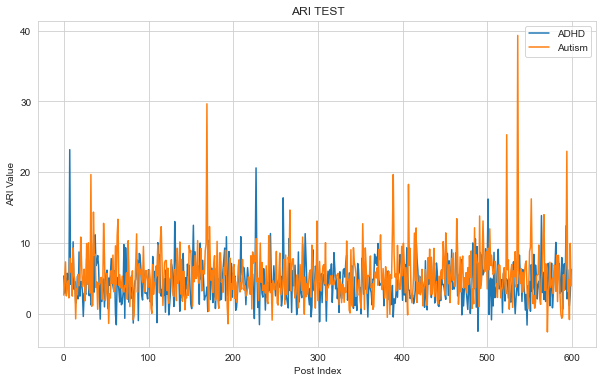

In [30]:
#Plotting data:

plt.figure(figsize=(10,6))

plt.plot(adhd_600['automated_readability_index'], label='ADHD')
plt.plot(autism_600['automated_readability_index'], label='Autism')

plt.title("ARI TEST")
plt.xlabel("Post Index")
plt.ylabel("ARI Value")

plt.legend()

plt.show()

In [41]:
#Further statistics:

adhd_description = adhd_600['automated_readability_index'].describe()
autism_description = autism_600['automated_readability_index'].describe()

print("\nADHD Descriptive Statistics:")
print(adhd_description)

print("\nAutism Descriptive Statistics:")
print(autism_description)



ADHD Descriptive Statistics:
count    600.000000
mean       4.543220
std        2.899863
min       -2.398070
25%        2.591525
50%        4.322931
75%        6.159581
max       23.210000
Name: automated_readability_index, dtype: float64

Autism Descriptive Statistics:
count    600.000000
mean       5.449998
std        3.685989
min       -2.498026
25%        3.254437
50%        4.930465
75%        7.024262
max       39.308163
Name: automated_readability_index, dtype: float64


In [44]:
#Further Further Statistics:

#Running Levene test to test for validity:

from scipy import stats

levene_stat, levene_p = stats.levene(adhd_600['automated_readability_index'], autism_600['automated_readability_index'])

print(f"Levene's Test: Stat={levene_stat}, P-Value={levene_p}")


Levene's Test: Stat=4.897162079233391, P-Value=0.027088815525661017


In [46]:
# P Value < 0.05 -> Equal Var = False -> We proceed with T-Test

In [48]:
t_stat, p_value = stats.ttest_ind(adhd_600['automated_readability_index'], autism_600['automated_readability_index'])

print(f"T-Test: T-Stat={t_stat}, P-Value={p_value}")


T-Test: T-Stat=-4.735952870654674, P-Value=2.4406521194653165e-06


**Very small P Value (Lower than extreme min value of 0.0001) indicates null hypothesis is NOT in effect and null hypothesis is REJECTED**

**Hence -> There is a significant reason behind the difference in values**

**T Test Value and Sign indicate ADHD have lower ARI than Autism to magnitude of 4.7**

